In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import pandas as pd
import glob
import pickle
from keras.utils.visualize_util import plot
%matplotlib inline

Using TensorFlow backend.


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/MNIST_data', one_hot=True)

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [19]:
vanishing_grad = np.zeros((9,10))

i = -1
for j, log in enumerate(glob.glob('logs/depth_*.log')):
    j = j % 10
    if j%10 == 0:
        i += 1
    model = pd.read_csv(log)
    last_acc = model['val_acc'].iloc[-1]
    vanishing_grad[i][j] = last_acc * 100
    if last_acc < .9:
        print(log,'[{},{}]'.format(i,j), last_acc)

        


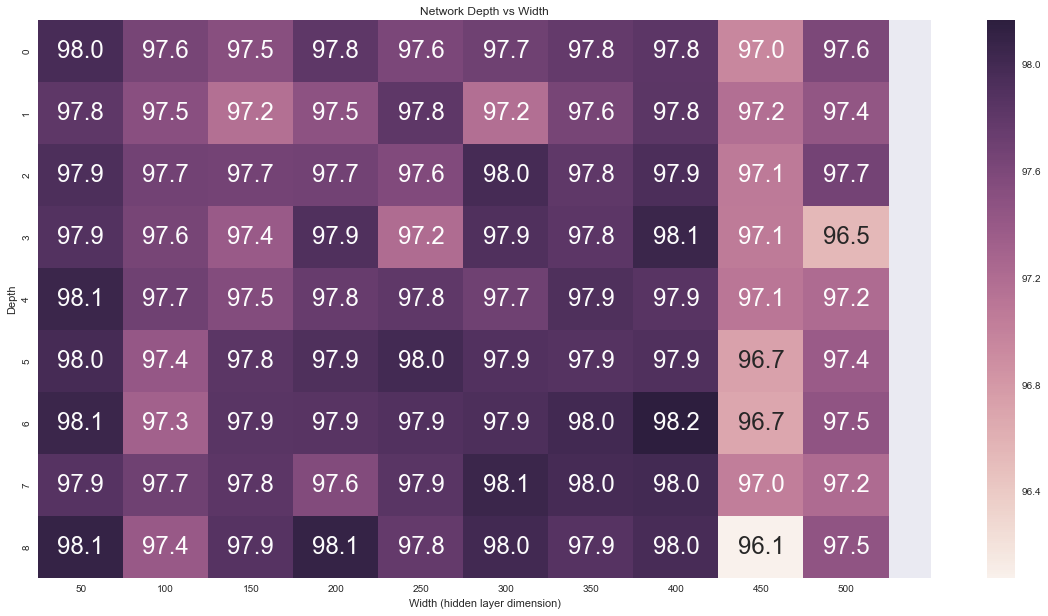

In [21]:
l = vanishing_grad[:,0]
r = vanishing_grad[:,-1]
vanishing_grad = np.copy(vanishing_grad)
vanishing_grad[:,0] = r
vanishing_grad[:,-1] = l
matplotlib.rcParams.update({'font.size': 24})
plt.figure(figsize=(20,10))
sns.heatmap(vanishing_grad, annot=True, fmt="0.1f")
plt.title('Network Depth vs Width')
plt.xticks([i + .5 for i in range(11)], [str(50+50*i) for i in xrange(10)])
plt.xlabel('Width (hidden layer dimension)')
plt.ylabel('Depth')
plt.savefig('/Users/seanwade/Desktop/dnn.png')
plt.show()